* Colab jupyter notebook끼리 import하기 위한 선언

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1

!ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1
'Ch01. 헬로 파이썬ipynb.ipynb'	 t10k-images-idx3-ubyte.gz
'Ch02. 퍼셉트론.ipynb'		 t10k-labels-idx1-ubyte.gz
'Ch03. 신경망.ipynb'		 train-images-idx3-ubyte.gz
'노트북 만들기.ipynb'		 train-labels-idx1-ubyte.gz
 sample


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import pickle

### 퍼셉트론에서 신경망으로
* 신경망이 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습해주는 능력

In [9]:
def step_function(x):
  y = x>0
  return y.astype(np.int)

In [4]:
x= np.array([-1, 1, 2])
x

array([-1,  1,  2])

In [6]:
y = x>0
y

array([False,  True,  True])

In [7]:
y.astype(np.int)

array([0, 1, 1])

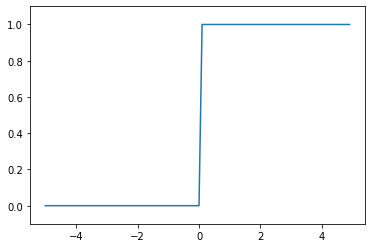

In [17]:
x = np.arange(-5, 5, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1,1.1)
plt.show()

In [3]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

In [20]:
x = np.array([-1, 1, 2])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

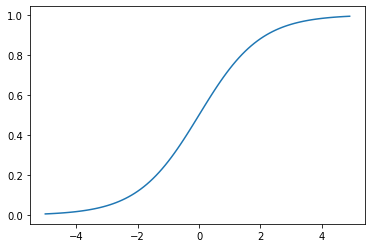

In [24]:
x = np.arange(-5, 5, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.show()

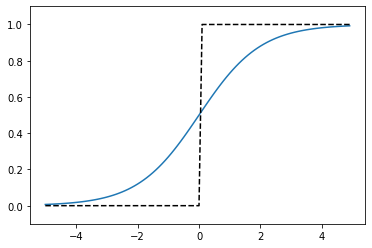

In [27]:
x = np.arange(-5, 5, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y1)
plt.plot(x, y2,'k--')
plt.ylim(-0.1, 1.1)
plt.show()

* 시그모이드는 결과값을 조절해서 내보내는 반면, 스텝펑션은 한번에 결과를 내보냄
* 둘다 비선형 함수라는 공통점이 있음
* 선형함수를 이용하면 층을 깊게하마는 의미가 없어짐 [ y(x)=h(h(h(x))) => y(x) = c*c*c*x ] 

In [28]:
def relu(x):
  return np.maximum(x,0)

In [29]:
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [30]:
np.ndim(A)

1

In [31]:
A.shape

(4,)

In [32]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [33]:
np.ndim(B)

2

In [34]:
B.shape

(3, 2)

In [36]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6], [7,8]])

In [37]:
A.shape

(2, 2)

In [38]:
B.shape

(2, 2)

In [40]:
# 행렬 곱
np.dot(A,B)

array([[19, 22],
       [43, 50]])

In [41]:
# 행렬 곱
np.dot(B, A)

array([[23, 34],
       [31, 46]])

In [42]:
A = np.array([[1,2],[3,4], [5,6]])
B = np.array([7,8])

In [43]:
A.shape

(3, 2)

In [44]:
B.shape

(2,)

In [45]:
np.dot(A,B)

array([23, 53, 83])

In [46]:
X = np.array([1,2])
X.shape

(2,)

In [47]:
W = np.array([[1,3,5], [2,4,6]])
W.shape

(2, 3)

In [48]:
np.dot(X, W)

array([ 5, 11, 17])

In [50]:
X = np.array([1.0, 5.0])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

(2,)
(2, 3)
(3,)


In [52]:
A1 = np.dot(X, W1) + B1
print(A1)

[1.2 2.5 3.8]


In [53]:
Z1 = sigmoid(A1)
print(Z1)

[0.76852478 0.92414182 0.97811873]


In [54]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [57]:
A2 = np.dot(Z1, W2) + B2
print(A2)

[0.65511646 1.55635206]


In [59]:
Z2 = sigmoid(A2)
print(Z2)

[0.65816252 0.82582927]


In [60]:
def identity_finction(x):
  return x

In [62]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [64]:
A3 = np.dot(Z2, W3) + B3
print(A3)

[0.33098211 0.72778046]


In [66]:
Y = identity_finction(A3)
Y 

array([0.33098211, 0.72778046])

In [67]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['B1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['B2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['B3'] = np.array([0.1, 0.2])

  return network

In [71]:
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['B1'], network['B2'], network['B3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_finction(a3)

  return y

In [72]:
network = init_network()

x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 항등함수와 소프트맥스 함수 구현하기

In [73]:
a = np.array([0.3, 2.9, 4.0])
print(a)

[0.3 2.9 4. ]


In [75]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [76]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [77]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [57]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

* softmax 사용시 오버플로 문제가 있음

In [88]:
a = np.array([1000, 1010, 999])
softmax(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

In [89]:
c= np.max(a)
c

1010

In [90]:
a - c

array([-10,   0, -11])

In [91]:
softmax(a-c)

array([4.53971105e-05, 9.99937902e-01, 1.67006637e-05])

In [92]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [94]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [95]:
np.sum(y)

1.0

In [143]:
os.listdir('/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/dataset_py')

['train-images-idx3-ubyte.gz',
 'cactus.png',
 't10k-labels-idx1-ubyte.gz',
 'train-labels-idx1-ubyte.gz',
 'map.png',
 '__init__.py',
 't10k-images-idx3-ubyte.gz',
 'cactus_gray.png',
 '__pycache__',
 'mnist.py']

In [24]:
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/sample']

In [5]:
sys.path.append('/content/drive/MyDrive/Colab Notebooks/밑바닥부터 시작하는 딥러닝 1/sample')

In [6]:
from sample.dataset_py import mnist

In [7]:
(x_train, y_train),(x_test, y_test)=mnist.load_mnist()

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [9]:
from PIL import Image

In [10]:
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  pil_img.show()

In [11]:
img = x_train[0]
label = y_train[0]
print(label)

5


In [12]:
print(img.shape)
img = (img.reshape(28,28))
print(img.shape)

(784,)
(28, 28)


In [13]:
img_show(img)

In [19]:
def get_data():
  (x_train, y_train),(x_test, y_test)=mnist.load_mnist(
      flatten = True, normalize=False, one_hot_label=False)
  return x_test, y_test

In [40]:
def init_network():
  with open("sample/ch03/sample_weight.pkl",'rb') as f:
    network = pickle.load(f)
  return network

In [52]:
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [53]:
x, t = get_data()

In [54]:
x.shape

(10000, 784)

In [55]:
network = init_network()

In [58]:
accuracy_count = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y)
  if p==t[i]:
    accuracy_count += 1
print("Accuacy : {}".format(float(accuracy_count) / len(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuacy : 0.9207


In [59]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [60]:
x.shape

(10000, 784)

In [61]:
W1.shape

(784, 50)

In [62]:
W2.shape

(50, 100)

In [63]:
W3.shape

(100, 10)

In [66]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치의 크기
accuracy_count = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_count += np.sum(p==t[i:i+batch_size])
  
print("Accuacy : {}".format(float(accuracy_count) / len(x)))

Accuacy : 0.9207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [68]:
a = np.random.randint(1,10,(4,3))
a

array([[8, 8, 6],
       [5, 7, 2],
       [2, 7, 1],
       [7, 5, 8]])

In [70]:
np.argmax(a, axis=1)

array([0, 1, 1, 2])